In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline


def distances(position):
    n = len(position)
    output = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            output[i][j] = np.linalg.norm(position[i]-position[j])
    return output

def arc_tan(x,y):
    output = np.arctan2(y,x)
    if output < 0:
        output += 2*np.pi
    return np.rad2deg(output)

def sweep(position, demand, capacity):
    normalized_position = position[1:] - position[0]
    theta_list = []
    for i in range(len(normalized_position)):
        theta_list.append(arc_tan(normalized_position[i][0],normalized_position[i][1]))
    theta_list, index_list, demand_list = zip(*sorted(zip(theta_list, list(range(1,len(position))),\
                                                          demand)))
    key = 1
    routes = {key:[]}
    zero = 0
    for i in range(len(theta_list)):
        if np.sum(demand_list[zero:i+1]) > capacity:
            key += 1
            routes[key] = []
            zero = i
        routes[key].append(index_list[i])
    return routes

def greedy_TLS(distance_matrix, route):
    route = copy.deepcopy(route)
    distance = sorted([(distance_matrix[0][j],j) for j in route])
    total_distance = distance[0][0]
    assigned_route = [0,distance[0][1]]
    route.remove(distance[0][1])
    while len(route) > 0:
        distance = sorted([(distance_matrix[assigned_route[-1]][j],j) for j in route])
        total_distance += distance[0][0]
        assigned_route.append(distance[0][1])
        route.remove(distance[0][1])
    return assigned_route, total_distance

def swap_TLS(distance_matrix, route):
    r = copy.deepcopy(route)
    
    initial_distance = 0
    for i in range(1,len(route)):
        initial_distance += distance_matrix[route[i-1]][route[i]]
    
    route_list = []
    distance_list = []
    
    for iterations in range(50):
        np.random.shuffle(r)
        route = [0] + list(r)
        for i in range(1,len(route)):
            for j in range(i,len(route)):
    #           key
    #           1 - abcde
    #           2 - acbde
    #           3 - abced
    #           4 - acbed
    #           5 - adebc
    #           6 - aedbc
    #           7 - adecb
    #           8 - aedcb
                a, b, c, d, e = route[i-1], route[i], route[j-1], route[j], route[-1]
                distance = [distance_matrix[a][b]+distance_matrix[c][d],\
                            distance_matrix[a][c]+distance_matrix[b][d],\
                            distance_matrix[a][b]+distance_matrix[c][e],\
                            distance_matrix[a][c]+distance_matrix[b][e],\
                            distance_matrix[a][d]+distance_matrix[e][b],\
                            distance_matrix[a][e]+distance_matrix[d][b],\
                            distance_matrix[a][d]+distance_matrix[e][c],\
                            distance_matrix[a][e]+distance_matrix[d][c]]
                sorted_distance, sorted_list = zip(*sorted(zip(distance, list(range(1,9)))))
                option = sorted_list[0]
                if option == 1:
                    pass
                elif option == 2:
                    route = route[:i] + route[j-1:i-1:-1] + route[j:]
                elif option == 3:
                    route = route[:i] + route[i:j] + route[:j-1:-1]
                elif option == 4:
                    route = route[:i] + route[j-1:i-1:-1] + route[:j-1:-1]
                elif option == 5:
                    route = route[:i] + route[j:] + route[i:j]
                elif option == 6:
                    route = route[:i] + route[:j-1:-1] + route[i:j]
                elif option == 7:
                    route = route[:i] + route[j:] + route[j-1:i-1:-1]
                elif option == 8:
                    route = route[:i] + route[:j-1:-1] + route[j-1:i-1:-1]
        post_distance = 0
        for i in range(1,len(route)):
            post_distance += distance_matrix[route[i-1]][route[i]]
        distance_list.append(post_distance)
        route_list.append(route)
    distance_list, route_list = zip(*sorted(zip(distance_list,route_list)))
    return route_list[0], distance_list[0]

In [2]:
final_list = []
for i in range(10):
    #number of deliveries in the range of 250 to 750
    number = int(np.floor(np.random.random()*500+250))
    position = np.random.random((number,2))*1000
    origin = np.array([[500,500]])
    position = np.concatenate((origin, position), axis=0)
    demand = np.random.random(number) * 10
    capacity = 60

    routes = sweep(position, demand, capacity)
    distance_matrix = distances(position)
    original_dist = 0
    for key in routes:
        route, dist = swap_TLS(distance_matrix, routes[key])
        original_dist += dist
        routes[key] = route
    percentage_list = []
    for i in range(1,11):
    #add some number of recycleable pick-ups
        new_number = int(i*0.1*number)
        new_position = np.random.random((new_number,2))*1000
        new_demand = np.zeros(new_number)
        new_position = np.concatenate((position, new_position), axis=0)
        new_demand = np.concatenate((demand, new_demand), axis=0)

        routes = sweep(new_position, new_demand, capacity)
        distance_matrix = distances(new_position)
        new_dist = 0
        for key in routes:
            route, dist = swap_TLS(distance_matrix, routes[key])
            new_dist += dist
            routes[key] = route
        percentage_list.append(new_dist/original_dist-1)
    final_list.append(percentage_list)



average = np.mean(np.array(final_list), axis = 0)
percentage = np.array(list(range(1,11)))*10

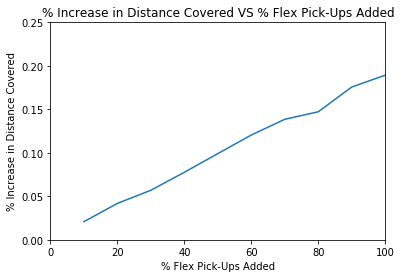

In [3]:
plt.plot(percentage,average)
plt.title("% Increase in Distance Covered VS % Flex Pick-Ups Added")
plt.xlabel("% Flex Pick-Ups Added")
plt.ylabel("% Increase in Distance Covered")
plt.xlim([0,100])
plt.ylim([0,0.25])
plt.show()

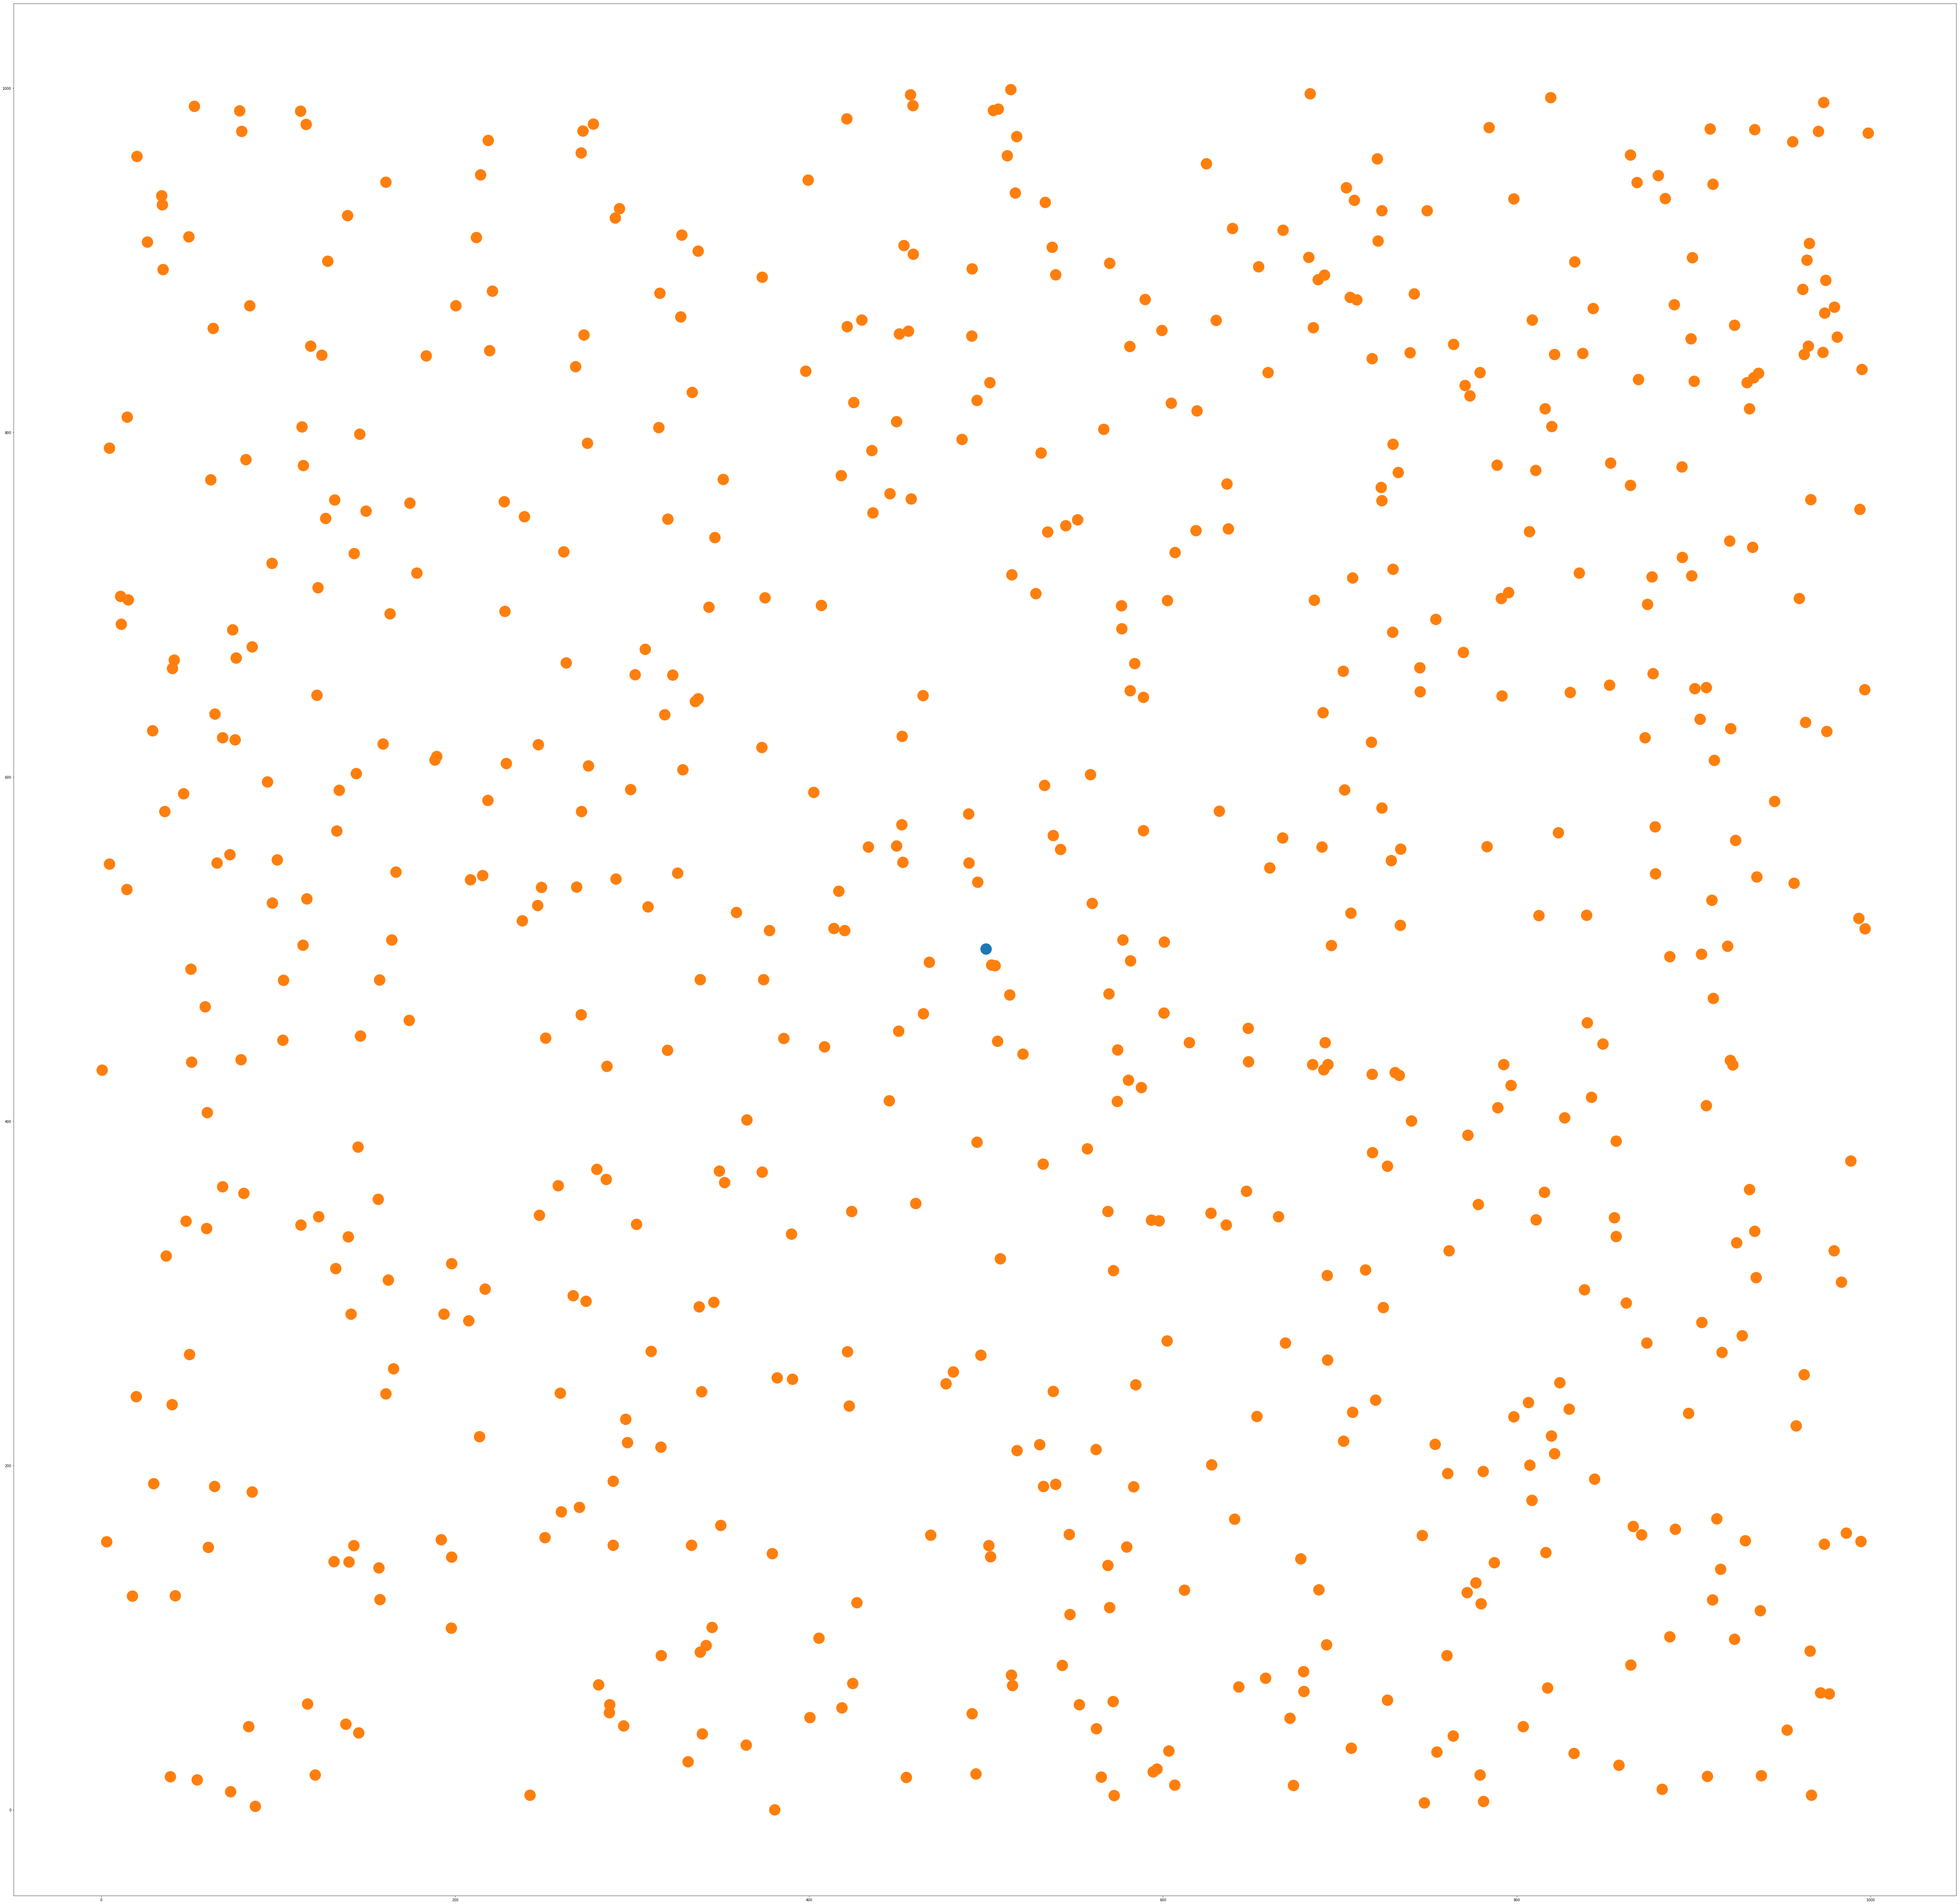

In [20]:
matplotlib.rcParams['figure.figsize'] = [100,100]
matplotlib.rcParams["axes.labelsize"] = 50

#number of deliveries in the range of 250 to 750
number = int(np.floor(np.random.random()*500+250))
position = np.random.random((number,2))*1000
origin = np.array([[500,500]])

scatter_data = np.transpose(position)
plt.scatter(500,500, s = 1000)
plt.scatter(scatter_data[0],scatter_data[1],s= 1000)
plt.show()

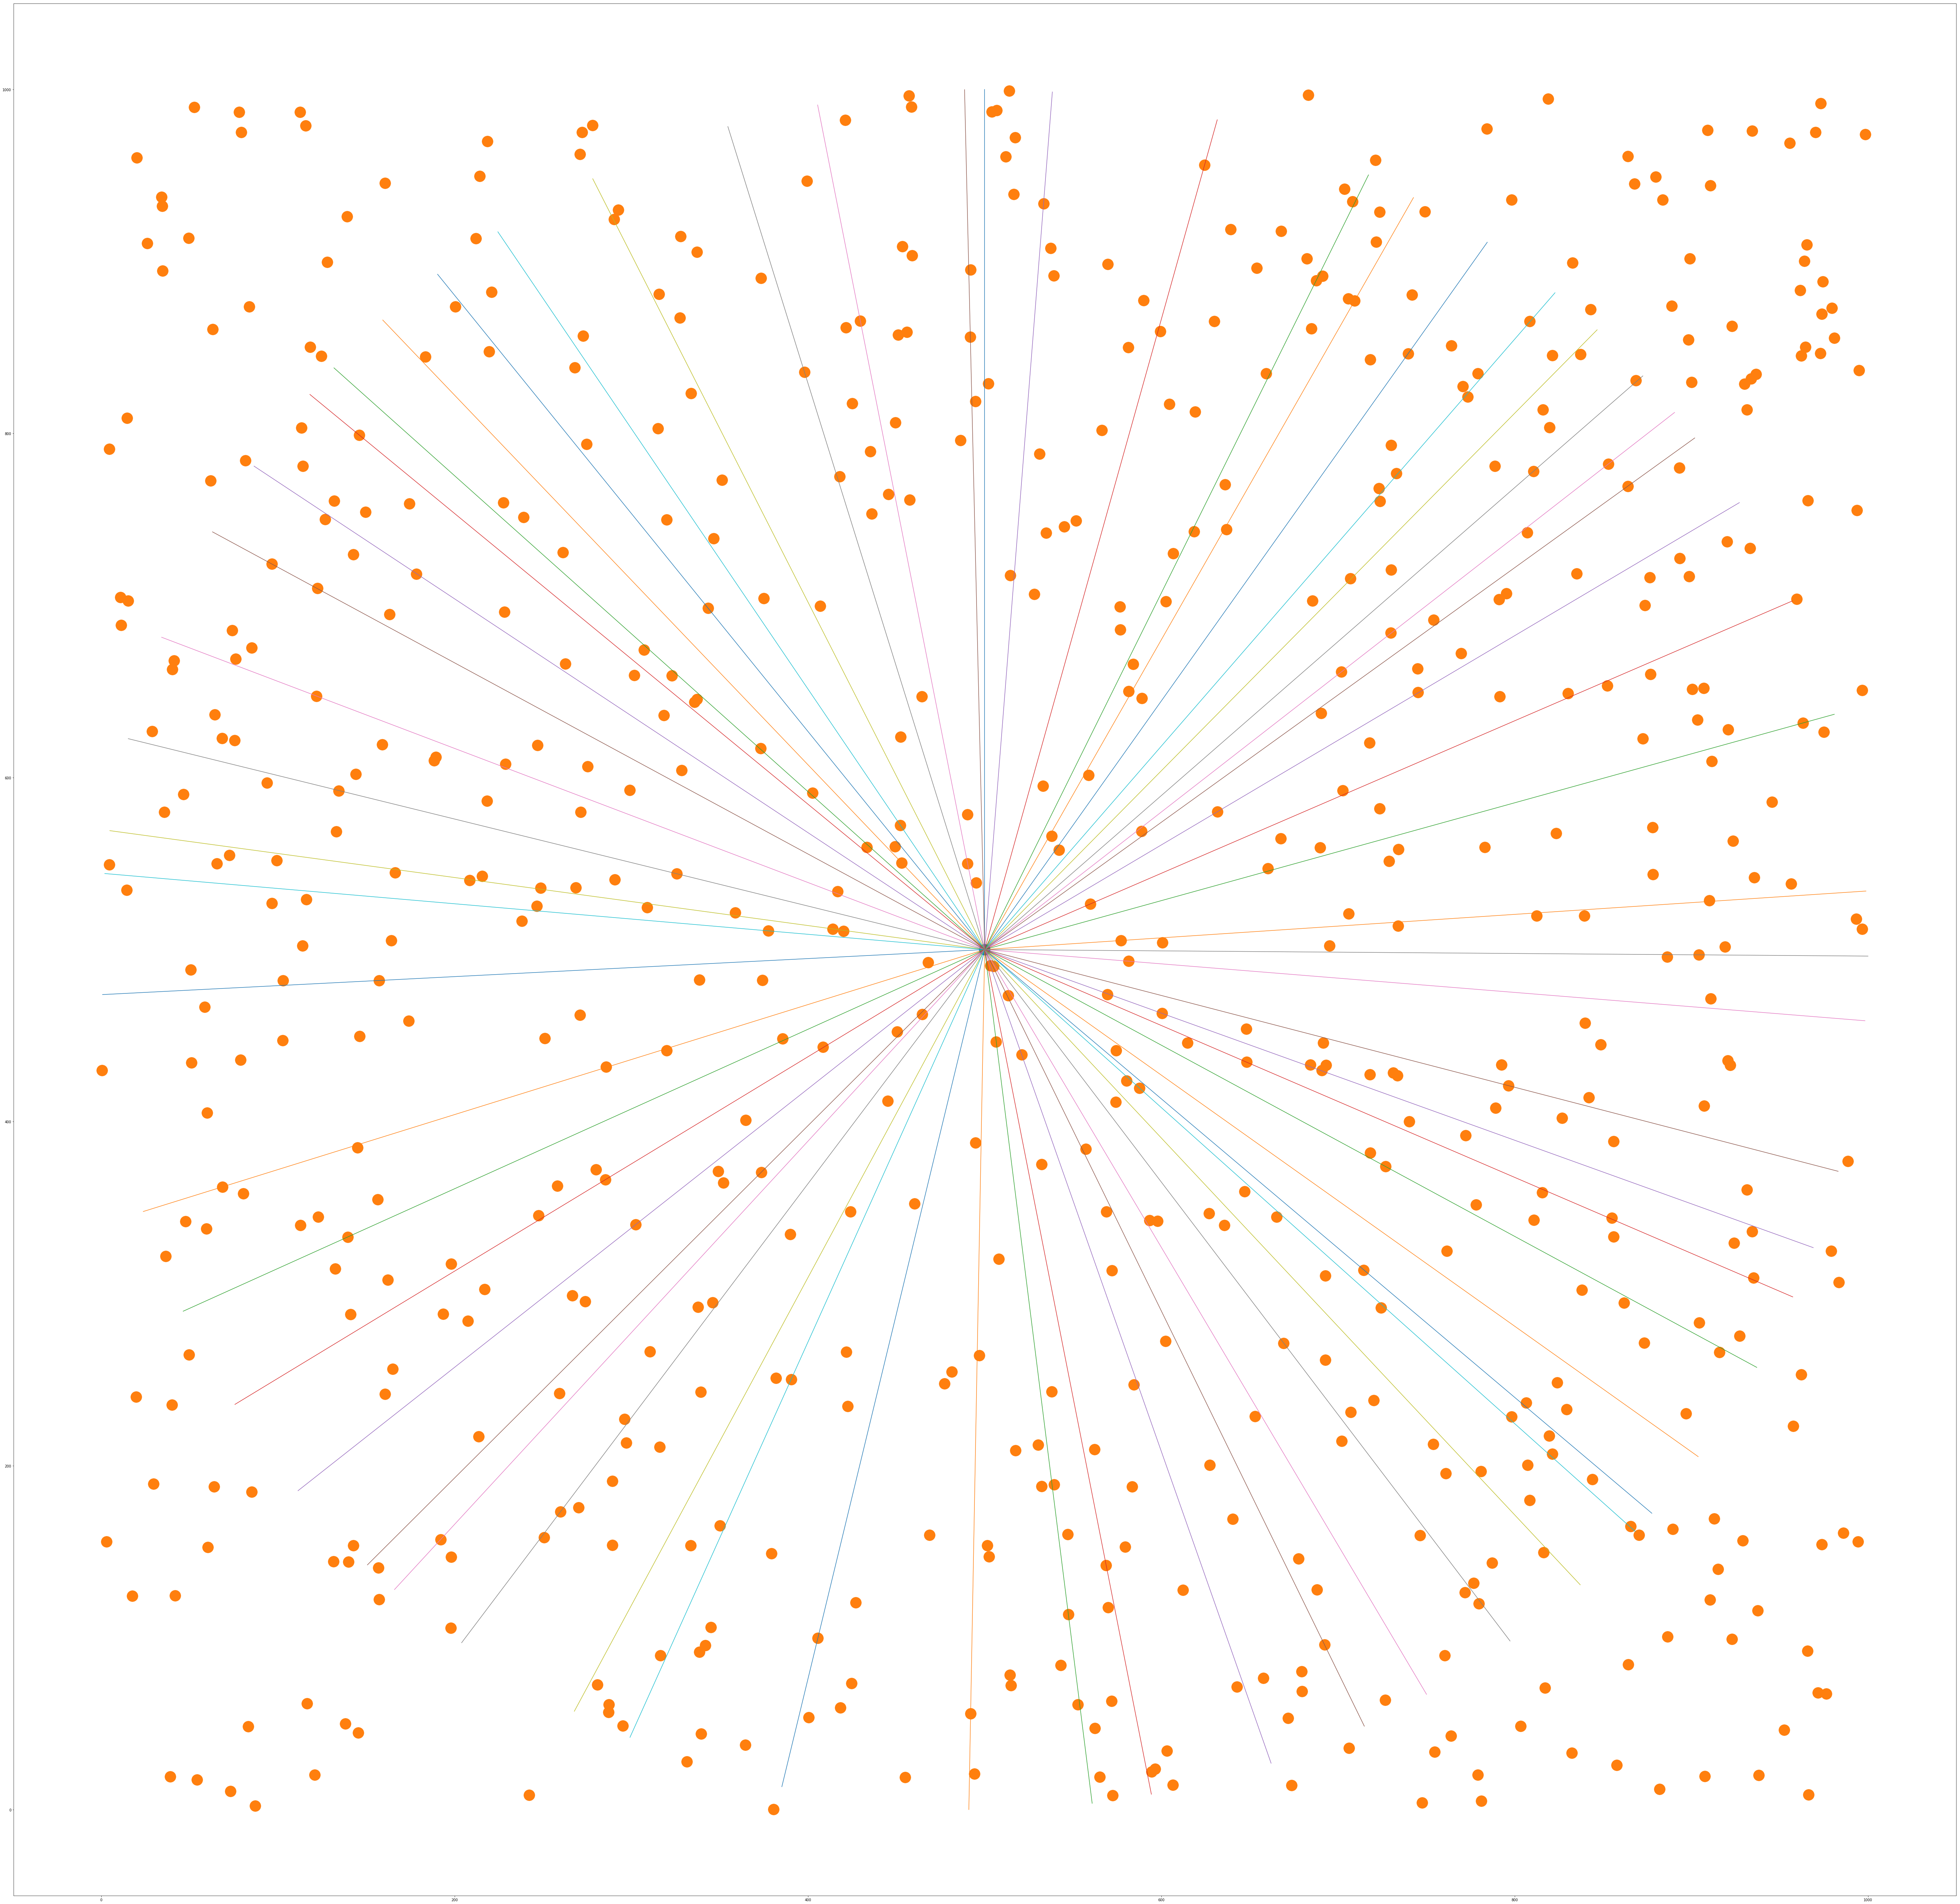

In [27]:
position = np.concatenate((origin, position), axis=0)
demand = np.random.random(number) * 10
capacity = 60
routes = sweep(position, demand, capacity)

plt.scatter(500,500, s = 1000)
plt.scatter(scatter_data[0],scatter_data[1],s= 1000)
plt.plot([500,500],[500,1000])
for key in routes:
    posit = position[routes[key][-1]] - np.array([500,500])
    theta = arc_tan(posit[0],posit[1])
    plt.plot([500,500*np.cos(theta/180*np.pi)+500],[500,500*np.sin(theta/180*np.pi)+500])
plt.show()

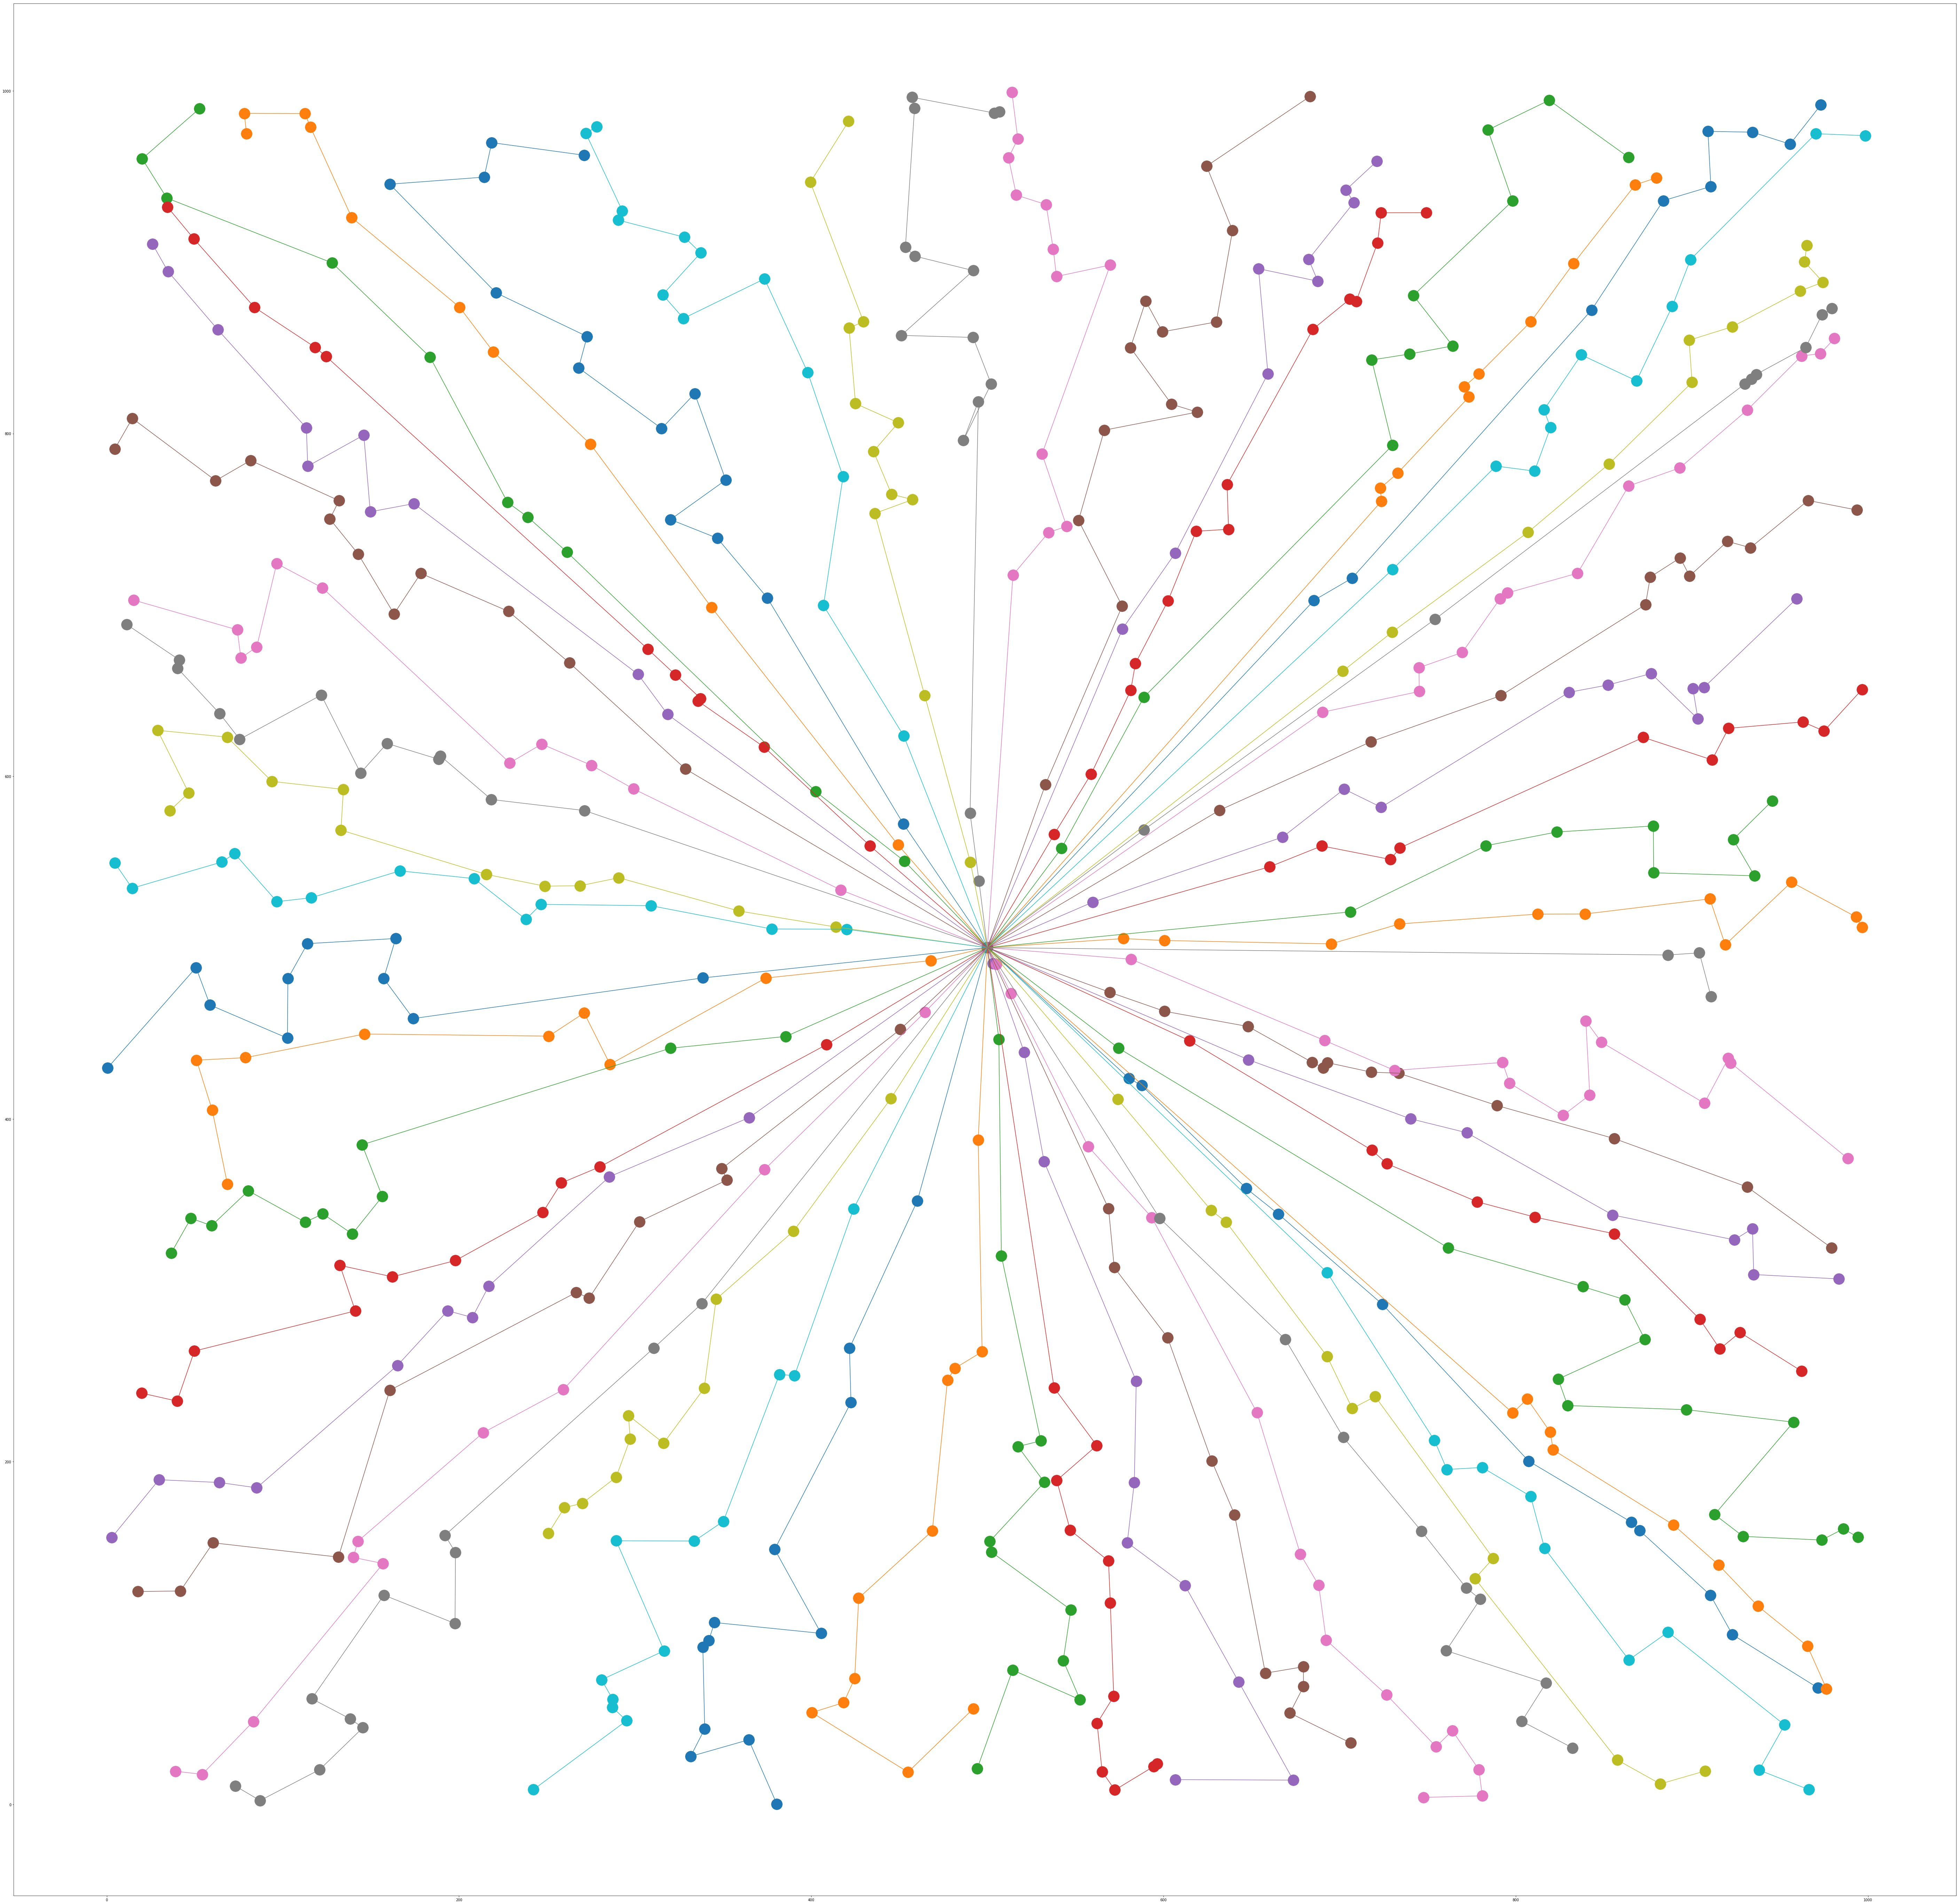

In [38]:
# for key in routes:
#     posit = position[routes[key][-1]] - np.array([500,500])
#     theta = arc_tan(posit[0],posit[1])
#     plt.plot([500,500*np.cos(theta/180*np.pi)+500],[500,500*np.sin(theta/180*np.pi)+500])

position = np.concatenate((origin, position), axis=0)
demand = np.random.random(number) * 10
capacity = 60

routes = sweep(position, demand, capacity)
distance_matrix = distances(position)
original_dist = 0
for key in routes:
    route, dist = swap_TLS(distance_matrix, routes[key])
    original_dist += dist
    route_position = []
    for i in range(len(route)):
        route_position.append(position[route[i]])
    plt.scatter(np.transpose(route_position)[0],np.transpose(route_position)[1],s=1000)
    plt.plot(np.transpose(route_position)[0],np.transpose(route_position)[1])
    routes[key] = route
plt.scatter(500,500,linewidths=500,s=10000, marker = 'x')
plt.show()


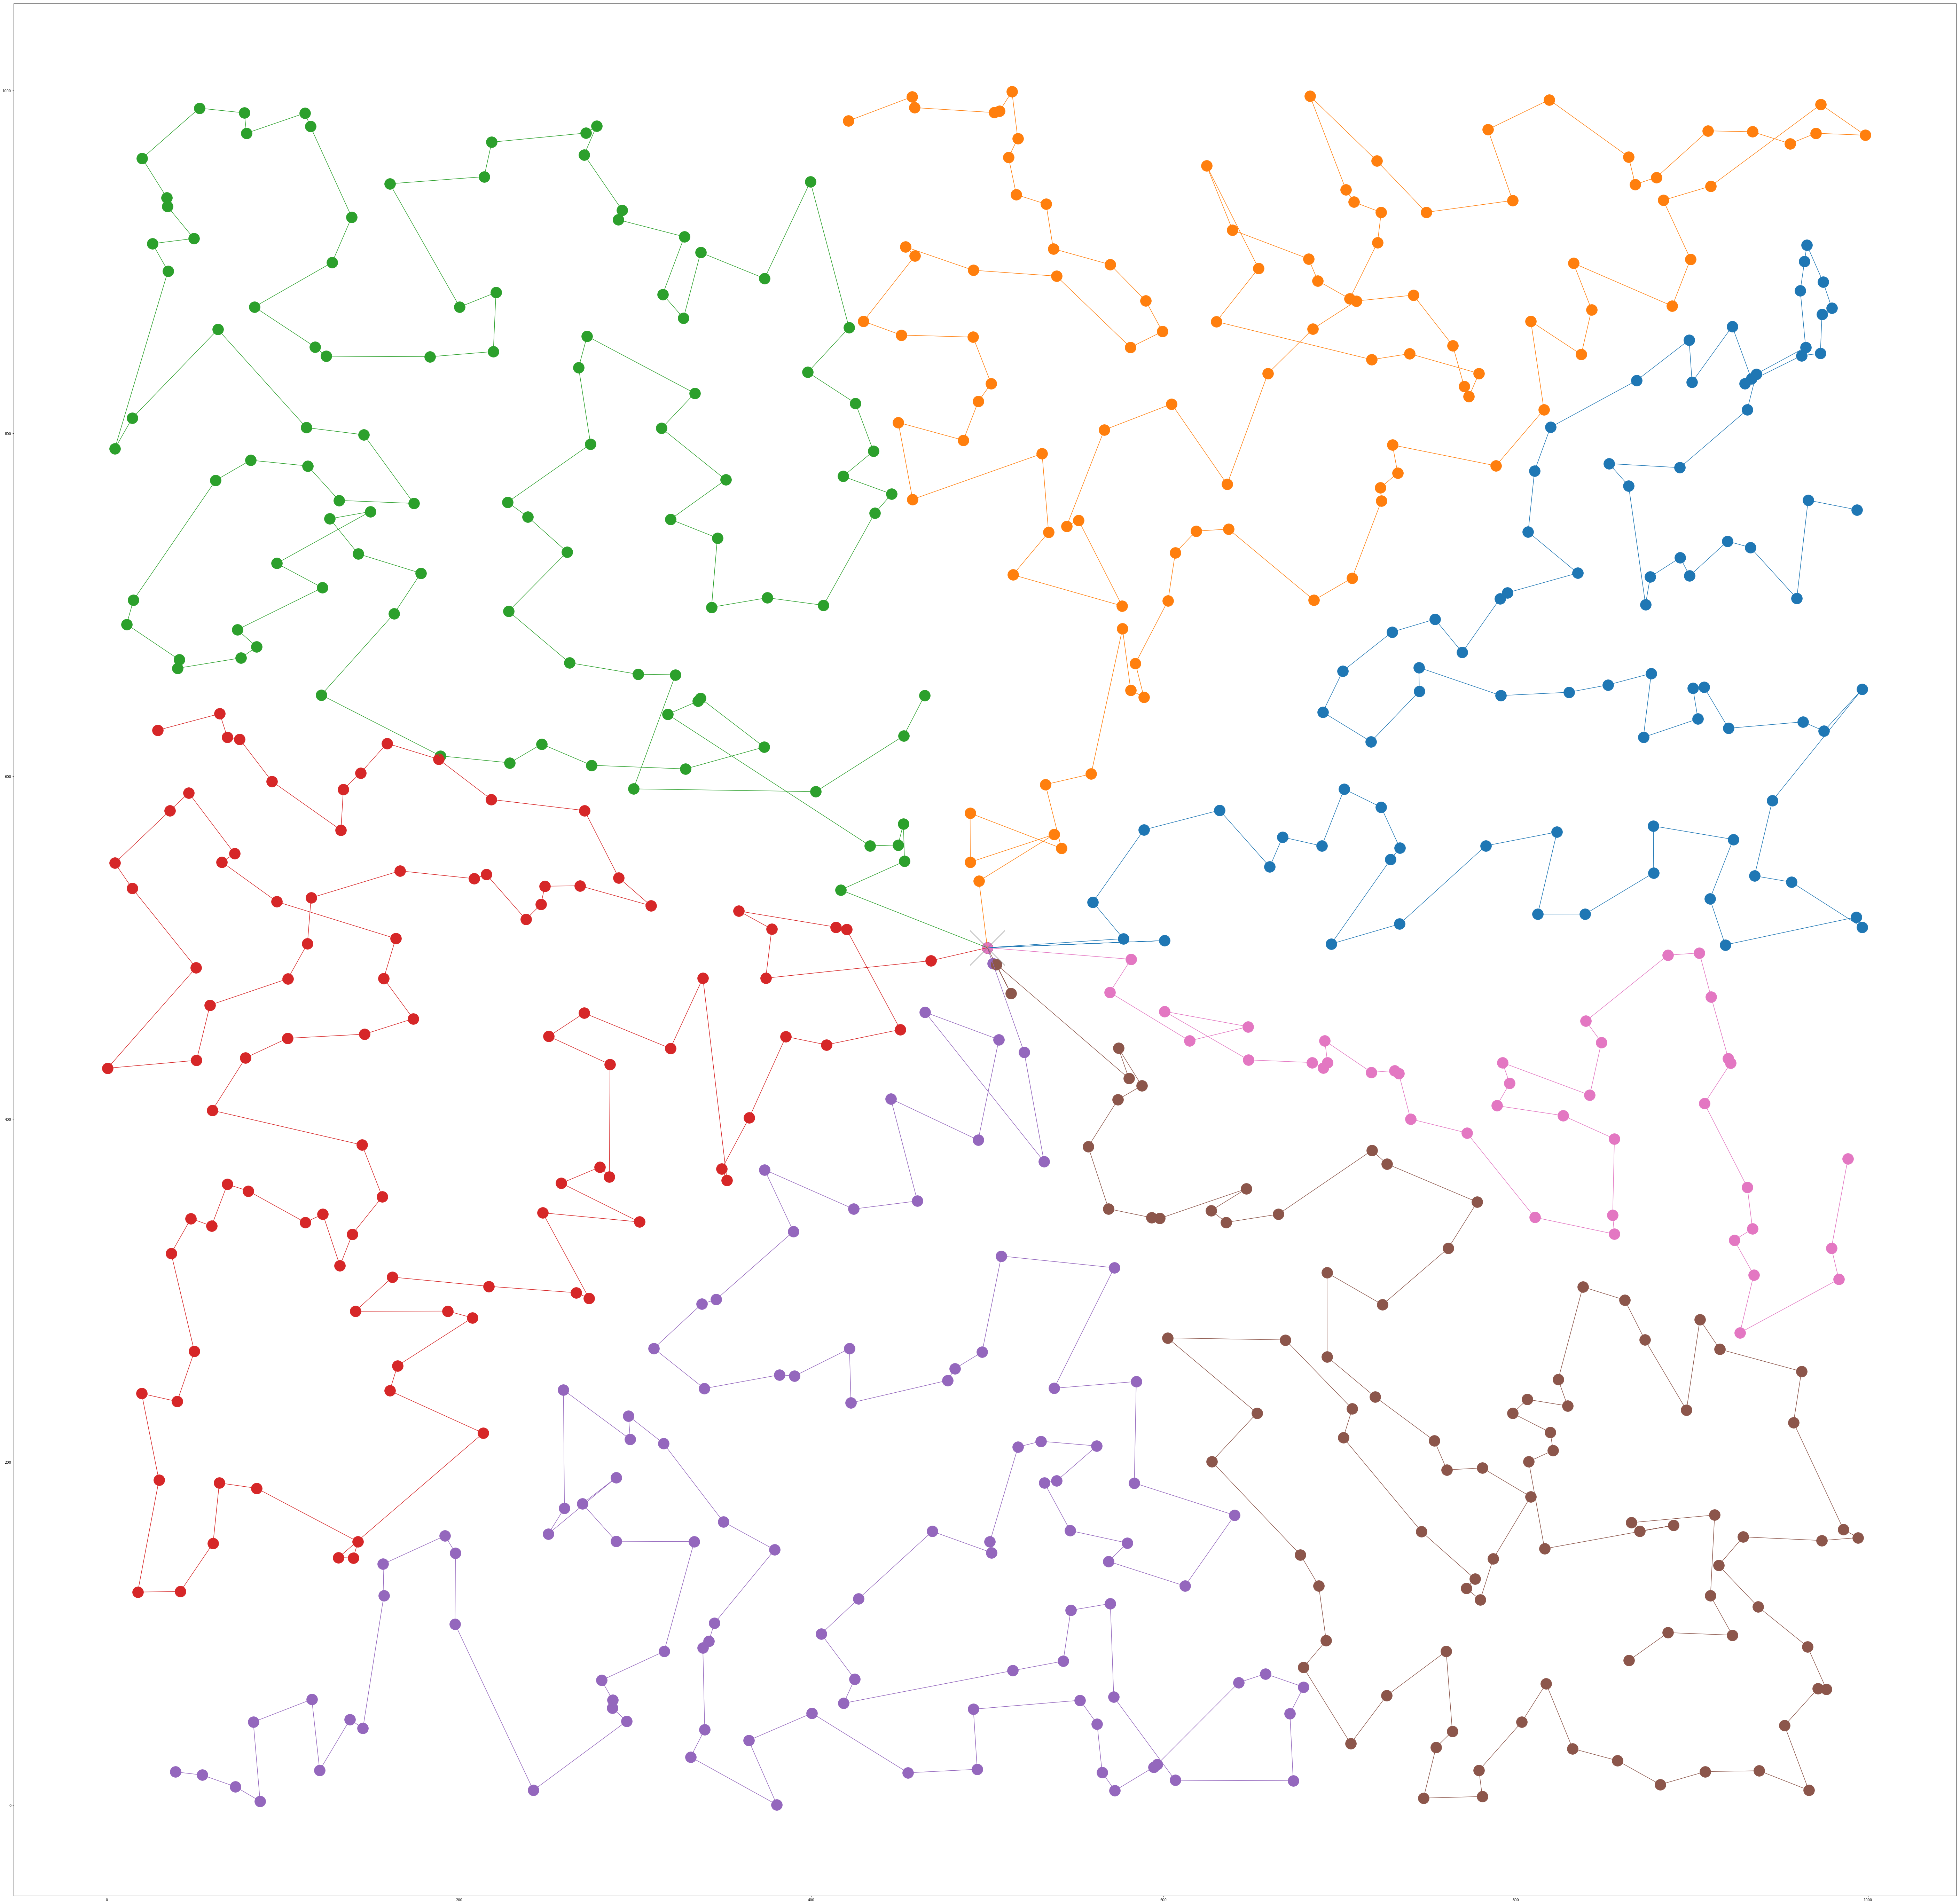

In [47]:
matplotlib.rcParams['figure.figsize'] = [100,100]
matplotlib.rcParams["axes.labelsize"] = 50

position = np.concatenate((origin, position), axis=0)
demand = np.random.random(number) * 2
capacity = 100

routes = sweep(position, demand, capacity)
distance_matrix = distances(position)
original_dist = 0
for key in routes:
    route, dist = swap_TLS(distance_matrix, routes[key])
    original_dist += dist
    route_position = []
    for i in range(len(route)):
        route_position.append(position[route[i]])
    plt.scatter(np.transpose(route_position)[0],np.transpose(route_position)[1],s=1000)
    plt.plot(np.transpose(route_position)[0],np.transpose(route_position)[1])
    routes[key] = route
plt.scatter(500,500,linewidths=500,s=10000, marker = 'x')
plt.show()